# Simulation Timestep & Substep Profiling

In this notebook we will perform profiling of the simulation substeps and timesteps. By profiling the substeps we can see if there are any performance bottlenecks in our partial state update blocks (one substep for each block), and by profiling the timesteps we can see if there is any performance degradation over the simulation run time.

In [1]:
import project_path
import notebooks.setup

time: 321 ms (started: 2021-07-13 15:56:14 +02:00)


In [2]:
import copy
import logging
from radcad import Engine
from time import time
from cadCAD_tools.profiling.visualizations import visualize_substep_impact, visualize_elapsed_time_per_ts

import experiments.notebooks.visualizations as visualizations
import experiments.default_experiment as default_experiment
from experiments.run import run

time: 3.74 s (started: 2021-07-13 15:56:14 +02:00)


In [3]:
def update_run_time(params, substep, state_history, previous_state, policy_input): return ('run_time', time())

measure_run_time_block = {
    'policies': {},
    'variables': {
        'run_time': update_run_time
    }
}

time: 24.5 ms (started: 2021-07-13 15:56:18 +02:00)


In [4]:
simulation = default_experiment.experiment.simulations[0]

time: 26.9 ms (started: 2021-07-13 15:56:18 +02:00)


In [5]:
profiled_state_update_blocks = []
profiled_state_update_blocks.append(measure_run_time_block)

for block in simulation.model.state_update_blocks:
    profiled_state_update_blocks.append(block)
    profiled_state_update_blocks.append(measure_run_time_block)
    
simulation.model.state_update_blocks = profiled_state_update_blocks
simulation.model.initial_state.update({'run_time': 0})

time: 28.3 ms (started: 2021-07-13 15:56:18 +02:00)


In [6]:
default_experiment.experiment.engine = Engine(drop_substeps=False)

time: 28.7 ms (started: 2021-07-13 15:56:18 +02:00)


In [7]:
df, exceptions = run(default_experiment.experiment)

2021-07-13 15:56:18,274 - root - INFO - Running experiment
2021-07-13 15:56:18,339 - root - INFO - Starting simulation 0 / run 0 / subset 0
2021-07-13 15:56:22,039 - root - INFO - Experiment complete in 3.764289140701294 seconds
2021-07-13 15:56:22,041 - root - INFO - Post-processing results
2021-07-13 15:56:26,957 - root - INFO - Post-processing complete in 4.917963981628418 seconds
time: 8.71 s (started: 2021-07-13 15:56:18 +02:00)


In [8]:
df['run_time']

1        1.626185e+09
2        1.626185e+09
3        1.626185e+09
4        1.626185e+09
5        1.626185e+09
             ...     
10436    1.626185e+09
10437    1.626185e+09
10438    1.626185e+09
10439    1.626185e+09
10440    1.626185e+09
Name: run_time, Length: 10440, dtype: float64

time: 36.1 ms (started: 2021-07-13 15:56:26 +02:00)


By profiling and visualizing the substep (partial state update block) performance, we can see that the last two partial state update blocks that calculate the system metrics take significantly more time than the other partial state update blocks. To improve the model implementation, it might be worth moving the metrics that aren't needed during runtime into a post-processing step. The downside of this technique is that it would introduce more software complexity in post-processing.

  0%|          | 0/360 [00:00<?, ?it/s]

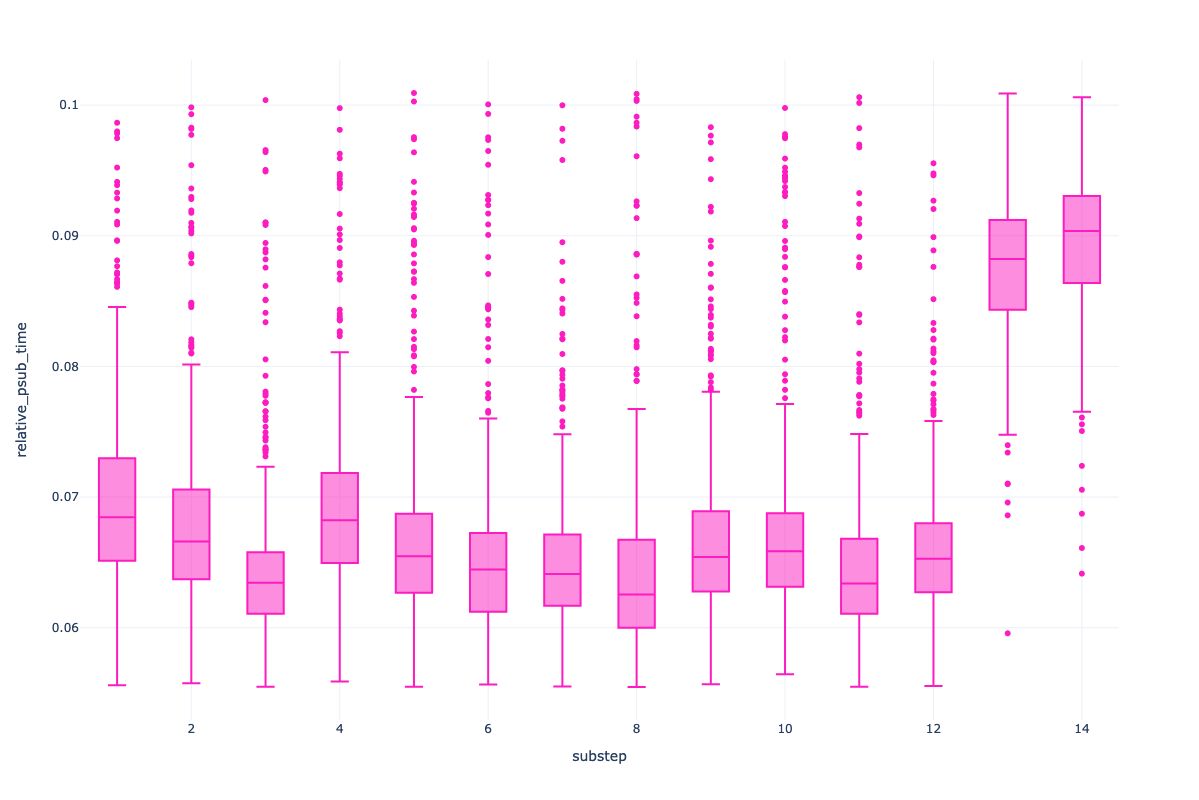

time: 4.05 s (started: 2021-07-13 15:56:27 +02:00)


In [9]:
visualize_substep_impact(df, relative=True)

By profiling the elapsed time per timestep, we can see a linear increase in the time since start, or that each timestep has roughly the same execution time throughout the simulation. This is good! It means there's no performance degradation due to for example an increasing size of state history.

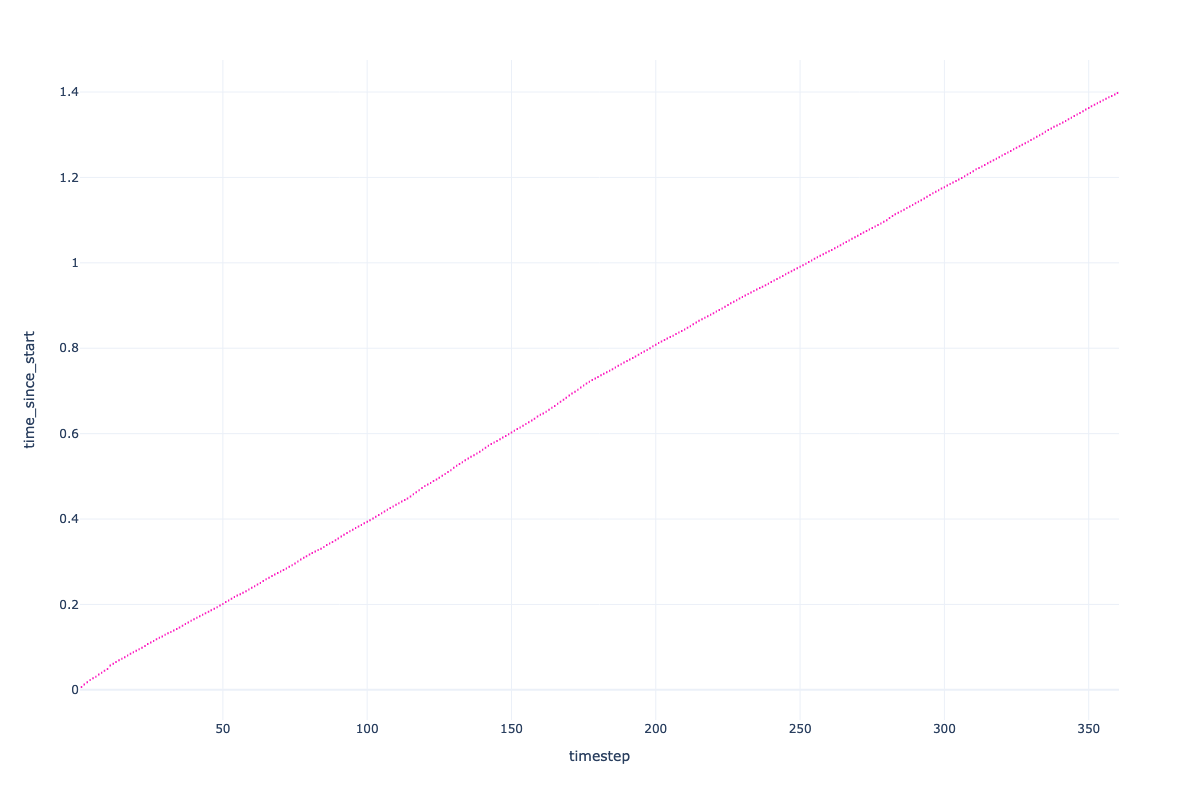

time: 130 ms (started: 2021-07-13 15:56:31 +02:00)


In [10]:
visualize_elapsed_time_per_ts(df, relative=False)

You can also profile the memory use of a Python function or script, but we'll leave that up to you to implement! https://pypi.org/project/memory-profiler/